# CNN (그림 인식)

input img: 
[[0 1 2]
 [3 4 5]
 [6 7 8]]
input shape:(1, 3, 3, 1)
fillter:[[[[1.]]

  [[1.]]]


 [[[1.]]

  [[1.]]]]
filterd: 
[[[[ 8.]
   [12.]]

  [[20.]
   [24.]]]]


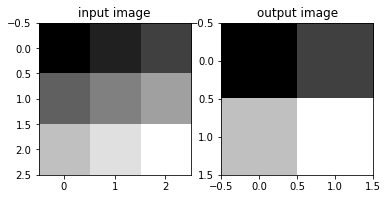

In [1]:
# 이미지를 인식하는 방법
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# 흑백
img = np.arange(9).reshape(3,3) 
print(f'input img: \n{img}')
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('input image')

x=np.float32(img.reshape(1,3,3,1))
print(f'input shape:{x.shape}')

filters = 1
ksize = 2
stride = 1

def kerner_init(shape, dtype):
    filter = tf.constant(1,shape=shape, dtype=dtype)
    print(f'fillter:{filter}')
    return filter

conv2d = tf.keras.layers.Conv2D(filters, ksize,
                               kernel_initializer = kerner_init,
                               input_shape=(3,3,1))

filterd = conv2d(x)
print(f'filterd: \n{filterd}')
out = filterd.numpy().reshape(2,2)
plt.subplot(1,2,2)
plt.imshow(out, cmap='gray')
plt.title('output image')
plt.show()

# TF Max Pool 실습
- 이미지의 크기를 줄이는 것 -> plooling
  - pool size가 클수록 이미지가 작아짐

(120, 120)
(120, 120, 3)


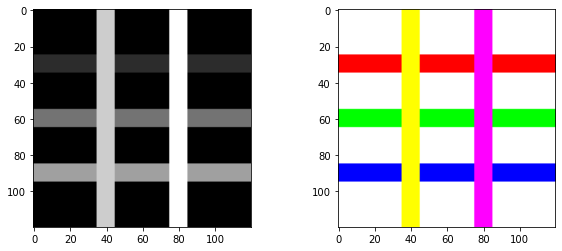

In [2]:
# 이미지를 인식하는 방법
import numpy as np
import matplotlib.pyplot as plt

# 흑백
gray = np.zeros((120,120), dtype=np.uint8)   # 120x120 2차원 배열 생성, 검은색 흑백 이미지
gray[25:35,:]  = 45                          # 25~35행 모든 열에 45 할당 
gray[55:65,:]  = 115                         # 55~65행 모든 열에 115 할당 
gray[85:95,:]  = 160                         # 85~95행 모든 열에 160 할당 
gray[:, 35:45] = 205                         # 모든행 35~45 열에 205 할당 
gray[:, 75:85] = 255
print(gray.shape)

#컬러
rgb = np.full((120,120, 3), fill_value=(255,255,255), dtype=np.uint8)    # 120x120 2차원 배열 생성, 3채널 컬러 이미지
rgb[25:35,:]  = [255,0,0]                       # 25~35행 모든 열에 [255,0,0], 빨강색 할당 
rgb[55:65,:]  = [0, 255, 0]                     # 55~65행 모든 열에 [0,255,0], 초록색 할당 
rgb[85:95,:]  = [0,0,255]                       # 85~95행 모든 열에 [0,0,255], 파랑색 할당 
rgb[:, 35:45] = [255,255,0]                     # 모든행 35~45 열에 [255,255,0], 하늘색 할당 
rgb[:, 75:85] = [255,0,255]
print(rgb.shape)

plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(rgb)
plt.show()

Text(0.5, 1.0, 'gx + gy')

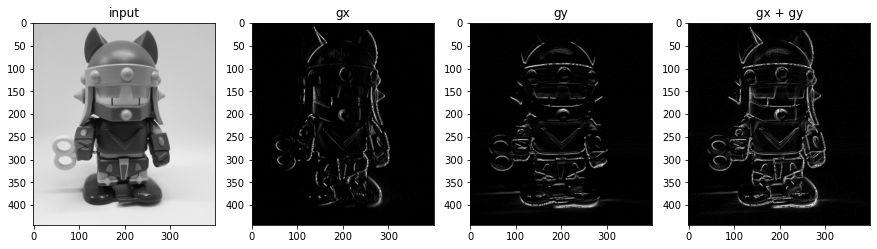

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt
import cv2

img = cv2.imread('./tkv.jpg', cv2.IMREAD_GRAYSCALE)
(h,w) = img.shape
x = img.reshape(1,h,w,1).astype(np.float32)

# x 방향 미분 커널
gx_k = np.array([[-1,0,1],
                 [-2,0,2],
                 [-1,0,1]])
gx_k = gx_k.reshape((3,3,1,1))

# y 방향 미분 커널
gy_k = np.array([[-1,-2,-1],
                 [0,0,0],
                 [1,2,1]])
gy_k = gy_k.reshape((3,3,1,1))

gx = tf.nn.conv2d(x, gx_k, [1,1,1,1], padding='SAME')
gx = gx.numpy()
gx[gx < 0 ] = 0  #음수 처리
gx = gx.reshape(h,w).astype(np.uint8)

gy = tf.nn.conv2d(x, gy_k, [1,1,1,1], padding='SAME')
gy = gy.numpy()
gy[gy < 0 ] = 0  #음수 처리
gy = gy.reshape(h,w).astype(np.uint8)

# 결과 출력
plt.figure(figsize=(15,5))
plt.subplot(141)
plt.imshow(img, cmap='gray')
plt.title("input")
plt.subplot(142)
plt.imshow(gx, cmap='gray')
plt.title("gx")
plt.subplot(143)
plt.imshow(gy, cmap='gray')
plt.title("gy")
plt.subplot(144)
plt.imshow(gx + gy, cmap='gray')
plt.title("gx + gy")

# Mnist 손글씨 분석

In [4]:
import tensorflow as tf
import numpy as np

n_input = 28*28
n_L1 = 300
n_L2 = 100
n_output = 10

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train/255.0
X_test = X_test/255.0
# X_train = X_train[..., tf.newaxis]
# X_test = X_test[..., tf.newaxis]

X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D(2, 2), 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu ), 
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(n_output, activation=tf.nn.softmax)
])
model.summary()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_valid, y_valid))

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print("Test Accuracy:{}".format(test_acc))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

## LeNet

In [5]:
import tensorflow as tf
import numpy as np

# 32, 32 ,1 (1채널 -> 흑백사진)
def make_LeNet(input_shape=(32, 32,1), output=10):
    padding = 'valid'
    if input_shape[0] < 32:
        padding = 'same'
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(6, 5, padding=padding, activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPool2D(2, 2),
        tf.keras.layers.Conv2D(16, 5, activation='relu'),
        tf.keras.layers.MaxPool2D(2, 2),
        tf.keras.layers.Conv2D(120, 5, activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(84, activation='relu' ), 
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(output, activation='softmax')
    ])
    return model

model = make_LeNet()
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten_1 (Flatten)         (None, 120)              

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

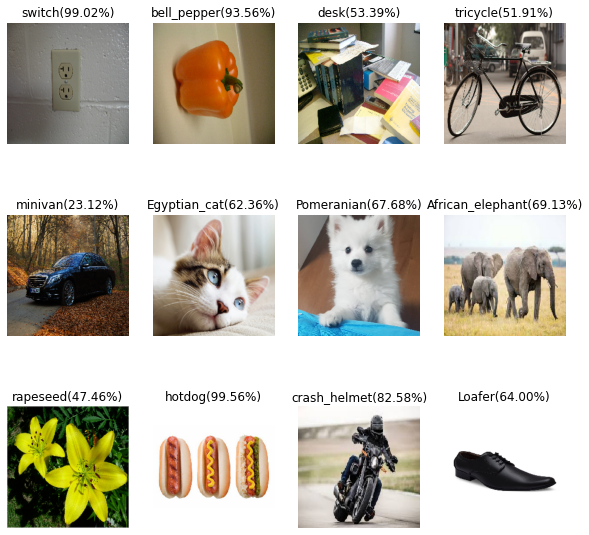

In [6]:
from tensorflow.keras.applications import VGG16

IMG_SIZE = 224
vgg16 = VGG16(weights='imagenet',
                  include_top=True,
                  input_shape=(IMG_SIZE, IMG_SIZE, 3))
vgg16.summary()

## 메터모스트에서 others.zip을 다운받아 현재코드와 같은 폴더에 압축해제하세요
## 위코드를 실행 후 새로 셀을 만들어 아래 셀을 실행하세요.


import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input,decode_predictions
import numpy as np
import glob
import matplotlib.pyplot as plt
import math

test_dir_path = './others/*.*'
test_paths = glob.glob(test_dir_path)

plt.figure(figsize=(10,10))
for i, path in enumerate(test_paths):
    img = tf.keras.preprocessing.image.load_img(path, target_size=(IMG_SIZE, IMG_SIZE))
    img_arr = tf.keras.preprocessing.image.img_to_array(img)#, dtype=np.uint8)
    img_arr = tf.expand_dims(img_arr, 0)

    pred = vgg16.predict(preprocess_input(img_arr))
    decoded = decode_predictions(pred)[0]
    plt.subplot(math.ceil(len(test_paths)/4), 4, i+1)
    plt.imshow(img)
    plt.title(f'{decoded[0][1]}({decoded[0][2]*100:.2f}%)')
    plt.axis('off')
plt.show()


## Transfer Learning
- 이미 학습된 모델을 재활용
- 새로 추가한 일부 층만 다시 재 학습
- include_top = False  => 기존에 학습된걸 지우고 새로 추가된 학습 데이터로 갱신

In [40]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(150,150,3))

In [41]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dense_6 (Dense)             (None, 256)               2097408   
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [43]:
conv_base.trainable=False

## Kaggle + 이미지 분류

In [8]:
# dogs vs cats 파일을 다운로드

import os
os.environ['KAGGLE_USERNAME'] = 'jaen11487'
os.environ['KAGGLE_KEY'] = '1e7109f613a54cba533ab49ab46927ff'
!kaggle competitions download -c dogs-vs-cats


  0%|          | 0.00/812M [00:00<?, ?B/s]
  0%|          | 1.00M/812M [00:00<03:27, 4.10MB/s]
  0%|          | 2.00M/812M [00:00<02:48, 5.05MB/s]
  0%|          | 3.00M/812M [00:00<02:40, 5.27MB/s]
  0%|          | 4.00M/812M [00:00<02:28, 5.71MB/s]
  1%|          | 5.00M/812M [00:00<02:34, 5.47MB/s]
  1%|          | 6.00M/812M [00:01<02:33, 5.51MB/s]
  1%|          | 7.00M/812M [00:01<02:39, 5.30MB/s]
  1%|          | 8.00M/812M [00:01<02:25, 5.81MB/s]
  1%|1         | 9.00M/812M [00:01<02:19, 6.06MB/s]
  1%|1         | 10.0M/812M [00:01<02:38, 5.31MB/s]
  1%|1         | 12.0M/812M [00:02<02:02, 6.83MB/s]
  2%|1         | 13.0M/812M [00:02<01:59, 7.04MB/s]
  2%|1         | 14.0M/812M [00:02<01:53, 7.35MB/s]
  2%|1         | 15.0M/812M [00:02<01:47, 7.79MB/s]
  2%|1         | 16.0M/812M [00:02<01:59, 6.96MB/s]
  2%|2         | 17.0M/812M [00:02<02:05, 6.62MB/s]
  2%|2         | 18.0M/812M [00:03<02:11, 6.33MB/s]
  2%|2         | 19.0M/812M [00:03<02:20, 5.91MB/s]
  2%|2         | 20.

 39%|###9      | 317M/812M [00:53<01:21, 6.34MB/s]
 39%|###9      | 318M/812M [00:53<01:23, 6.18MB/s]
 39%|###9      | 319M/812M [00:53<01:20, 6.46MB/s]
 39%|###9      | 320M/812M [00:54<01:18, 6.59MB/s]
 40%|###9      | 321M/812M [00:54<01:27, 5.89MB/s]
 40%|###9      | 322M/812M [00:54<01:35, 5.38MB/s]
 40%|###9      | 323M/812M [00:54<01:33, 5.49MB/s]
 40%|###9      | 324M/812M [00:54<01:28, 5.80MB/s]
 40%|####      | 325M/812M [00:55<01:36, 5.27MB/s]
 40%|####      | 327M/812M [00:55<01:21, 6.28MB/s]
 40%|####      | 328M/812M [00:55<01:16, 6.65MB/s]
 41%|####      | 329M/812M [00:55<01:22, 6.11MB/s]
 41%|####      | 330M/812M [00:55<01:22, 6.13MB/s]
 41%|####      | 331M/812M [00:56<01:23, 6.02MB/s]
 41%|####      | 332M/812M [00:56<01:19, 6.33MB/s]
 41%|####1     | 333M/812M [00:56<01:13, 6.83MB/s]
 41%|####1     | 334M/812M [00:56<01:09, 7.25MB/s]
 41%|####1     | 335M/812M [00:56<01:10, 7.08MB/s]
 41%|####1     | 336M/812M [00:56<01:11, 6.99MB/s]
 41%|####1     | 337M/812M [00:

In [10]:
# cat_dog 파일이 없을경우 파일 생성

import zipfile
import os
dir_path = 'cat_dog'

if not os.path.exists(dir_path):
    os.makedirs(dir_path)

In [12]:
# train을 압축해제한뒤 cat_dog 폴더에 넣음
with zipfile.ZipFile("train.zip" , "r") as zip_ref:
    zip_ref.extractall(dir_path)

In [13]:
# train, test 폴더에 cat, dog폴더 생성
sub_dirs = ['train', 'test']
label_dirs = ['cat', 'dog']
for sub_dir in sub_dirs:
    for label_dir in label_dirs:
        os.makedirs(os.path.join(dir_path, sub_dir, label_dir), exist_ok=True)

In [14]:
# train에 있는 이미지를 test로 복사
import glob
import random
import shutil

files = glob.glob(dir_path + '/train/*.jpg')
split_ratio = 0.25

for file in files:
    filename = os.path.basename(file)
    print('file copying...', file, end='\r')
    dst_dir = 'train'
    if random.random() < split_ratio :
        dst_dir = 'test'
    if filename.startswith('cat'):
        dst = os.path.join(dir_path, dst_dir, 'cat', filename)
    else :
        dst = os.path.join(dir_path, dst_dir, 'dog', filename)
    shutil.copyfile(file, dst)
print('copy done.')

copy done.ng... cat_dog/train\dog.9999.jpgg cat_dog/train\cat.10179.jpg cat_dog/train\cat.11492.jpg cat_dog/train\cat.1474.jpg cat_dog/train\cat.1625.jpg cat_dog/train\cat.2238.jpg cat_dog/train\cat.2600.jpg cat_dog/train\cat.2686.jpg cat_dog/train\cat.2712.jpg cat_dog/train\cat.3340.jpg cat_dog/train\cat.3442.jpgcat_dog/train\cat.3488.jpg cat_dog/train\cat.3529.jpg cat_dog/train\cat.4054.jpg cat_dog/train\cat.4160.jpgcat_dog/train\cat.4487.jpg cat_dog/train\cat.5660.jpg cat_dog/train\cat.5730.jpg cat_dog/train\cat.6224.jpg cat_dog/train\cat.6490.jpg cat_dog/train\cat.8832.jpgcat_dog/train\cat.8892.jpg cat_dog/train\cat.895.jpgcat_dog/train\cat.9578.jpg cat_dog/train\dog.10262.jpgcat_dog/train\dog.11056.jpg cat_dog/train\dog.11156.jpg cat_dog/train\dog.11872.jpg cat_dog/train\dog.12264.jpgcat_dog/train\dog.12411.jpg cat_dog/train\dog.137.jpgcat_dog/train\dog.2171.jpg cat_dog/train\dog.2339.jpg cat_dog/train\dog.2352.jpg cat_dog/train\dog.2566.jpg cat_dog/train\dog.2665.jpg cat_dog/trai

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.1,
      horizontal_flip=True,
      fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255) #검증 데이타, 증식 없슴
train_generator = train_datagen.flow_from_directory(
        os.path.join(dir_path, 'train'), # 타깃 디렉터리
        target_size=(150, 150),# 모든 이미지의 크기를 150 × 150로 변경
        batch_size=20,
        class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
        os.path.join(dir_path, 'test'),
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 18652 images belonging to 2 classes.
Found 6348 images belonging to 2 classes.


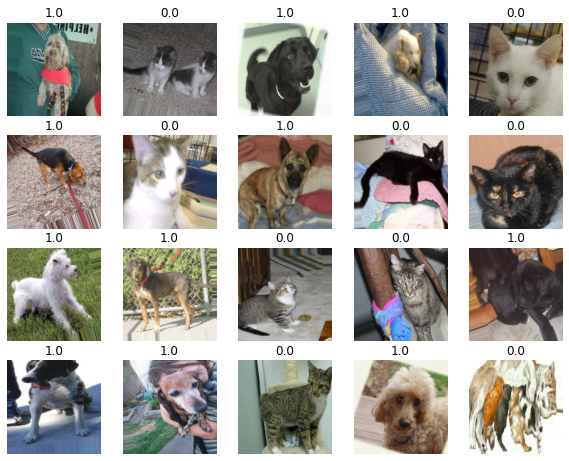

In [37]:
# 개가 있는 그림이 1.0 => 개 그림 찾기
image_batch, label_batch = next(train_generator)

plt.figure(figsize=(10,10))
for n in range(20):
    plt.subplot(5,5,n+1)
    plt.imshow(image_batch[n])
    plt.title(label_batch[n])
    plt.axis('off')

In [44]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

C:\Users\user\AppData\Local\Temp/ipykernel_6056/684895644.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
100/100 - 333s - loss: 0.5385 - acc: 0.7455 - val_loss: 0.4333 - val_acc: 0.8190 - 333s/epoch - 3s/step
Epoch 2/30
100/100 - 330s - loss: 0.4331 - acc: 0.8135 - val_loss: 0.3781 - val_acc: 0.8430 - 330s/epoch - 3s/step
Epoch 3/30
100/100 - 330s - loss: 0.3818 - acc: 0.8310 - val_loss: 0.3237 - val_acc: 0.8630 - 330s/epoch - 3s/step
Epoch 4/30
100/100 - 328s - loss: 0.3641 - acc: 0.8365 - val_loss: 0.3331 - val_acc: 0.8580 - 328s/epoch - 3s/step
Epoch 5/30
100/100 - 328s - loss: 0.3522 - acc: 0.8355 - val_loss: 0.3095 - val_acc: 0.8580 - 328s/epoch - 3s/step
Epoch 6/30
100/100 - 327s - loss: 0.3366 - acc: 0.8540 - val_loss: 0.2849 - val_acc: 0.8800 - 327s/epoch - 3s/step
Epoch 7/30
100/100 - 326s - loss: 0.3210 - acc: 0.8635 - val_loss: 0.2734 - val_acc: 0.8790 - 326s/epoch - 3s/step
Epoch 8/30
100/100 - 326s - loss: 0.3334 - acc: 0.8530 - val_loss: 0.2748 - val_acc: 0.8770 - 326s/epoch - 3s/step
Epoch 9/30


KeyboardInterrupt: 